In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tic_env import *

## Qustion 11

In [2]:
Turns = np.array(['X','O'])
player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
env1 = DQNlearningEnv(player1=player1, player2=player2)
env1.train(20000)

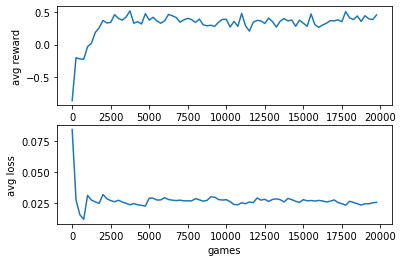

In [10]:
import matplotlib.pyplot as plt
length1=250
lst1 = env1.get_reward(player=1)
# lst1 = env1.training_reward_list["X"]
x_ticks = range(0, len(lst1), length1)

avg_reward1 = []
for i in range(len(lst1)//length1):
    avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)

plt.subplot(2,1,1)
plt.plot(list(x_ticks), avg_reward1)
plt.xlabel(f'games')
plt.ylabel('avg reward')

lst2 = env1.losses
x_ticks2 = range(0, len(lst2), length1)

avg_loss = []
for i in range(len(lst2)//length1):
    avg_loss.append(sum(lst2[i*length1:(i+1)*length1])/length1)

plt.subplot(2,1,2)
plt.plot(list(x_ticks2), avg_loss)
plt.xlabel(f'games')
plt.ylabel('avg loss')

plt.savefig('./img/q11.png')

## Question 12

In [2]:
Turns = np.array(['X','O'])
player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
env2 = DQNlearningEnv(player1=player1, player2=player2)
env2.set_batch_one()
env2.train(20000)

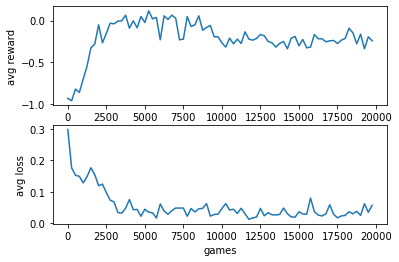

In [3]:
import matplotlib.pyplot as plt
length1=250
lst1 = env2.get_reward(player=1)
x_ticks = range(0, len(lst1), length1)

avg_reward1 = []
for i in range(len(lst1)//length1):
    avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)

lst2 = env2.losses
x_ticks2 = range(0, len(lst2), length1)

avg_loss = []
for i in range(len(lst2)//length1):
    avg_loss.append(sum(lst2[i*length1:(i+1)*length1])/length1)

plt.subplot(2,1,1)
plt.plot(list(x_ticks), avg_reward1)
plt.xlabel(f'games')
plt.ylabel('avg reward')

plt.subplot(2,1,2)
plt.plot(list(x_ticks2), avg_loss)
plt.xlabel(f'games')
plt.ylabel('avg loss')

plt.savefig('./img/q12.png')

## Question 13

In [2]:
Turns = np.array(['X','O'])
test_reward_lists_random_3 = []
test_reward_lists_optimal_3 = []
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
# epoch_stars = [1]
for epoch_star in epoch_stars:
    player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env3 = DQNlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=epoch_star)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random_3.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_3.append(env3.test_avg_reward['optimal'])

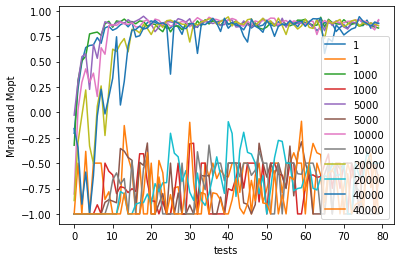

In [10]:
# M_rand
# plt.figure()
for j in range(len(epoch_stars)):
    plt.plot(test_reward_lists_random_3[j], label=str(epoch_stars[j]))
    plt.plot(test_reward_lists_optimal_3[j], label=str(epoch_stars[j]))
plt.xlabel(f'tests')
plt.ylabel('Mrand and Mopt')
plt.legend()
plt.savefig("./img/q13.jpg")


# M_opt
# plt.figure()
# for j in range(len(epoch_stars)):
#     plt.plot(test_reward_lists_optimal_3[j], label=str(epoch_stars[j]))
# plt.xlabel(f'tests')
# plt.ylabel('Mopt')
# plt.legend()

## Question 14

In [2]:
Turns = np.array(['X','O'])
best_epoch_star = 20000
test_reward_lists_random_4 = []
test_reward_lists_optimal_4 = []
test_epses = [0, 0.1, 0.2, 0.4, 0.6, 0.8]
for test_eps in test_epses:
    player1 = DQNPlayer(epsilon=0.01, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env3 = DQNlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=best_epoch_star)
    env3.set_testing(test_eps=test_eps)
    env3.train(20000)
    test_reward_lists_random_4.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_4.append(env3.test_avg_reward['optimal'])

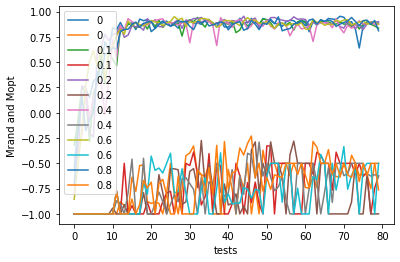

In [5]:
# M_rand
plt.figure()
for j in range(len(test_epses)):
    plt.plot(test_reward_lists_random_4[j], label=str(test_epses[j]))
    plt.plot(test_reward_lists_optimal_4[j], label=str(test_epses[j]))
    plt.xlabel(f'tests')
    plt.ylabel('Mrand and Mopt')
plt.legend()
plt.savefig("./img/q14.jpg")

## Question 15

In [13]:
highest_reward_random = max(max(test_reward_lists_random_4))
highest_reward_random

0.942

In [14]:
highest_reward_opt = max(max(test_reward_lists_optimal_4))
highest_reward_opt
####finish

-0.274